# First of all we must extract text

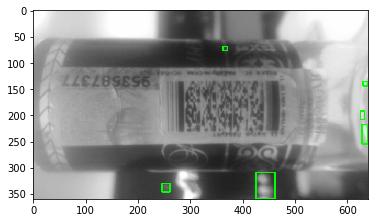

In [2]:
import cv2
import numpy as np

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

large = cv2.imread('test_data/final720/photo1.jpg')
rgb = cv2.pyrDown(large)
small = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
grad = cv2.morphologyEx(small, cv2.MORPH_GRADIENT, kernel)

_, bw = cv2.threshold(grad, 0.0, 255.0, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 1))
connected = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)
# using RETR_EXTERNAL instead of RETR_CCOMP
contours = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[1]

mask = np.zeros(bw.shape, dtype=np.uint8)

for idx in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[idx])
    mask[y:y+h, x:x+w] = 0
    cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
    r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)

    if r > 0.45 and w > 8 and h > 8:
        cv2.rectangle(rgb, (x, y), (x+w-1, y+h-1), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB))

## Bad result

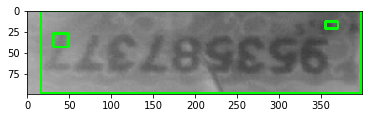

In [3]:
def numberprepare(image):

    img = img_as_float(image)
    logarithmic_corrected = adjust_log(img, 1)
    img_log_clah = equalize_adapthist(logarithmic_corrected, clip_limit=0.03)
    gray = rgb2gray(img_log_clah)

    seed = np.copy(gray)
    seed[1:-1, 1:-1] = gray.max()
    mask = gray

    filled = reconstruction(seed, mask, method='erosion')
    # holes = denoise_wavelet(rank.enhance_contrast(gray-filled+1, disk(6)))
    # niblack = holes > threshold_niblack(holes, window_size=71, k=0.9)
    holes = denoise_wavelet(rank.enhance_contrast(gray-filled+1, disk(6)))
    
    thresh_min = threshold_mean(holes)
    binary_min = holes > thresh_min
    
    filtered_smallest_noise = remove_small_holes(img_as_ubyte(binary_min), 100)
    
    opened = binary_opening(filtered_smallest_noise, disk(2))
    # eroded = binary_erosion(opened, disk(2))
    # eroded = binary_erosion(filtered_smallest_noise, disk(2))
    # eroded = filtered_smallest_noise
    
    # filtered_larger_noise = remove_small_holes(img_as_ubyte(opened), 200)
    filtered_larger_noise = binary_dilation(opened, disk(2))

    return filtered_larger_noise

# src = Image.open('test_data/final720/photo1.jpg')
src = cv2.imread('test_data/final720/photo1.jpg')

# First source
# rotated = src.rotate(-90, expand=True)

number = src[218:218+99, 89:89+399]
number_g = cv2.cvtColor(number, cv2.COLOR_BGR2GRAY)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
grad = cv2.morphologyEx(number_g, cv2.MORPH_GRADIENT, kernel)

_, bw = cv2.threshold(grad, 0.0, 255.0, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 1))
connected = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)
# using RETR_EXTERNAL instead of RETR_CCOMP
contours = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[1]

mask = np.zeros(bw.shape, dtype=np.uint8)

for idx in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[idx])
    mask[y:y+h, x:x+w] = 0
    cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
    r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)

    if r > 0.45 and w > 8 and h > 8:
        cv2.rectangle(number, (x, y), (x+w-1, y+h-1), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(number, cv2.COLOR_BGR2RGB))

## Another second-rate result

/media/levabd/ScienceProjects/Code/Science-Repos/scikit-image/skimage/util/dtype.py:123: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/media/levabd/ScienceProjects/Code/Science-Repos/scikit-image/skimage/util/dtype.py:123: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/media/levabd/ScienceProjects/Code/Science-Repos/scikit-image/skimage/morphology/misc.py:203: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  "Did you mean to use a boolean array?", UserWarning)


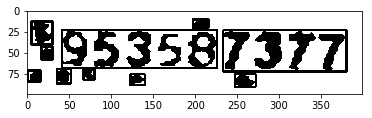

In [4]:
from PIL import Image

from skimage.color import rgb2gray
from skimage.exposure import equalize_adapthist, adjust_log
from skimage.restoration import denoise_tv_chambolle, denoise_wavelet, denoise_bilateral
from skimage.filters import threshold_niblack
from skimage.util import img_as_float, img_as_ubyte, img_as_uint, invert
from skimage.morphology import reconstruction
from skimage.morphology import remove_small_objects, remove_small_holes
from skimage.morphology import disk, diamond, square
from skimage.filters import rank
from skimage.filters import threshold_mean
from skimage.morphology import erosion, dilation, opening, closing, binary_opening, binary_closing, binary_dilation, binary_erosion

def numberprepare(image):

    img = img_as_float(image)
    logarithmic_corrected = adjust_log(img, 1)
    img_log_clah = equalize_adapthist(logarithmic_corrected, clip_limit=0.03)
    gray = rgb2gray(img_log_clah)

    seed = np.copy(gray)
    seed[1:-1, 1:-1] = gray.max()
    mask = gray

    filled = reconstruction(seed, mask, method='erosion')
    # holes = denoise_wavelet(rank.enhance_contrast(gray-filled+1, disk(6)))
    # niblack = holes > threshold_niblack(holes, window_size=71, k=0.9)
    holes = denoise_wavelet(rank.enhance_contrast(gray-filled+1, disk(6)))
    
    thresh_min = threshold_mean(holes)
    binary_min = holes > thresh_min
    
    filtered_smallest_noise = remove_small_holes(img_as_ubyte(binary_min), 100)
    
    opened = binary_opening(filtered_smallest_noise, disk(2))
    # eroded = binary_erosion(opened, disk(2))
    # eroded = binary_erosion(filtered_smallest_noise, disk(2))
    # eroded = filtered_smallest_noise
    
    # filtered_larger_noise = remove_small_holes(img_as_ubyte(opened), 200)
    filtered_larger_noise = binary_dilation(opened, disk(2))

    return opened

src = Image.open('test_data/final720/photo1.jpg')
# src = cv2.imread('test_data/final720/photo1.jpg')

number = src.crop((89, 218, 89+399, 218+99)).rotate(180, expand=True)
filtered_number = numberprepare(number)

number = img_as_ubyte(filtered_number)
# number_g = cv2.cvtColor(number, cv2.COLOR_BGR2GRAY)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
grad = cv2.morphologyEx(number, cv2.MORPH_GRADIENT, kernel)

_, bw = cv2.threshold(grad, 0.0, 255.0, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 1))
connected = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)
# using RETR_EXTERNAL instead of RETR_CCOMP
contours = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[1]

mask = np.zeros(bw.shape, dtype=np.uint8)

for idx in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[idx])
    mask[y:y+h, x:x+w] = 0
    cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
    r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)

    if r > 0.45 and w > 8 and h > 8:
        cv2.rectangle(number, (x, y), (x+w-1, y+h-1), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(number, cv2.COLOR_GRAY2RGB))

## Not all digits detected, but noise detected as text

/media/levabd/ScienceProjects/Code/Science-Repos/scikit-image/skimage/util/dtype.py:123: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/media/levabd/ScienceProjects/Code/Science-Repos/scikit-image/skimage/util/dtype.py:123: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/media/levabd/ScienceProjects/Code/Science-Repos/scikit-image/skimage/morphology/misc.py:203: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  "Did you mean to use a boolean array?", UserWarning)


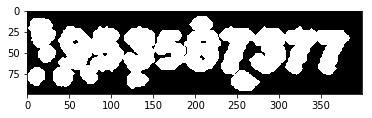

In [6]:
def numberprepare(image):

    img = img_as_float(image)
    logarithmic_corrected = adjust_log(img, 1)
    img_log_clah = equalize_adapthist(logarithmic_corrected, clip_limit=0.03)
    gray = rgb2gray(img_log_clah)

    seed = np.copy(gray)
    seed[1:-1, 1:-1] = gray.max()
    mask = gray

    filled = reconstruction(seed, mask, method='erosion')
    # holes = denoise_wavelet(rank.enhance_contrast(gray-filled+1, disk(6)))
    # niblack = holes > threshold_niblack(holes, window_size=71, k=0.9)
    holes = denoise_wavelet(rank.enhance_contrast(gray-filled+1, disk(6)))
    
    thresh_min = threshold_mean(holes)
    binary_min = holes > thresh_min
    
    filtered_smallest_noise = remove_small_holes(img_as_ubyte(binary_min), 100)
    
    opened = binary_opening(filtered_smallest_noise, disk(2))
    # eroded = binary_erosion(opened, disk(2))
    # eroded = binary_erosion(filtered_smallest_noise, disk(2))
    # eroded = filtered_smallest_noise
    
    # filtered_larger_noise = remove_small_holes(img_as_ubyte(opened), 200)
    filtered_larger_noise = binary_dilation(opened, disk(2))

    return filtered_smallest_noise

src = Image.open('test_data/final720/photo1.jpg')
# src = cv2.imread('test_data/final720/photo1.jpg')

number = src.crop((89, 218, 89+399, 218+99)).rotate(180, expand=True)
filtered_number = numberprepare(number)

number = img_as_ubyte(filtered_number)
inverted = img_as_ubyte(invert(filtered_number))

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
dilated = cv2.dilate(inverted, kernel, iterations = 5) # dilate
_, contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) # get contours

# for each contour found, draw a rectangle around it on original image
for contour in contours:
    # get rectangle bounding contour
    [x,y,w,h] = cv2.boundingRect(contour)

    # discard areas that are too large
    if h>300 and w>300:
        continue

    # discard areas that are too small
    if h<40 or w<40:
        continue

    # draw rectangle around contour on original image
    cv2.rectangle(number, (x,y), (x+w,y+h), (0,0,0), 2)


plt.imshow(cv2.cvtColor(number, cv2.COLOR_GRAY2RGB))
plt.imshow(cv2.cvtColor(dilated, cv2.COLOR_GRAY2RGB))

## Not robust
Try another kernel

/media/levabd/ScienceProjects/Code/Science-Repos/scikit-image/skimage/util/dtype.py:123: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/media/levabd/ScienceProjects/Code/Science-Repos/scikit-image/skimage/util/dtype.py:123: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/media/levabd/ScienceProjects/Code/Science-Repos/scikit-image/skimage/morphology/misc.py:203: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  "Did you mean to use a boolean array?", UserWarning)


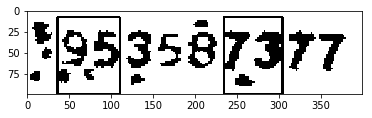

In [9]:
def numberprepare(image):

    img = img_as_float(image)
    logarithmic_corrected = adjust_log(img, 1)
    img_log_clah = equalize_adapthist(logarithmic_corrected, clip_limit=0.03)
    gray = rgb2gray(img_log_clah)

    seed = np.copy(gray)
    seed[1:-1, 1:-1] = gray.max()
    mask = gray

    filled = reconstruction(seed, mask, method='erosion')
    # holes = denoise_wavelet(rank.enhance_contrast(gray-filled+1, disk(6)))
    # niblack = holes > threshold_niblack(holes, window_size=71, k=0.9)
    holes = denoise_wavelet(rank.enhance_contrast(gray-filled+1, disk(6)))
    
    thresh_min = threshold_mean(holes)
    binary_min = holes > thresh_min
    
    filtered_smallest_noise = remove_small_holes(img_as_ubyte(binary_min), 100)
    
    opened = binary_opening(filtered_smallest_noise, disk(2))
    # eroded = binary_erosion(opened, disk(2))
    # eroded = binary_erosion(filtered_smallest_noise, disk(2))
    # eroded = filtered_smallest_noise
    
    # filtered_larger_noise = remove_small_holes(img_as_ubyte(opened), 200)
    filtered_larger_noise = binary_dilation(opened, disk(2))

    return filtered_smallest_noise

src = Image.open('test_data/final720/photo1.jpg')
# src = cv2.imread('test_data/final720/photo1.jpg')

number = src.crop((89, 218, 89+399, 218+99)).rotate(180, expand=True)
filtered_number = numberprepare(number)

number = img_as_ubyte(filtered_number)
inverted = img_as_ubyte(invert(filtered_number))

N=3
kernel = np.zeros((N,N), dtype=np.uint8)
kernel[(N-1)//2,:] = 1  # Bug solved with // (integer division)

dilated_image = cv2.dilate(inverted / 255, kernel, iterations=16)

kernel = np.zeros((N,N), dtype=np.uint8)
kernel[:,(N-1)//2] = 1  # Bug solved with // (integer division)
    
dilated = cv2.dilate(inverted, kernel, iterations = 16) # dilate
_, contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) # get contours

# for each contour found, draw a rectangle around it on original image
for contour in contours:
    # get rectangle bounding contour
    [x,y,w,h] = cv2.boundingRect(contour)

    # discard areas that are too large
    if h>300 and w>300:
        continue

    # discard areas that are too small
    if h<40 or w<40:
        continue

    # draw rectangle around contour on original image
    cv2.rectangle(number, (x,y), (x+w,y+h), (0,0,0), 2)


plt.imshow(cv2.cvtColor(number, cv2.COLOR_GRAY2RGB))